## we will try to predict the prices of some King Country - Seattle houses by using regression

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('kc_house_data.csv')

### now we will do Explanatory Data Analysis (EDA) and data cleaning

In [10]:
# number of the missing data per column
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
# now we transform zipcode column into category type because it has no numeric value, it is a grouping factor
df['zipcode']=df['zipcode'].astype('category')

In [16]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [17]:
df.corr() #pearson correlation matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406


In [19]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [20]:
df['floors'].nunique()

6

In [21]:
df.shape

(21613, 21)

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
# there are some outliers. they will confuse the algorythm if we dont get rid of them
df = df[df['bedrooms'] < 10]

In [25]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702047
grade            0.667455
sqft_above       0.605595
sqft_living15    0.585388
bathrooms        0.525092
view             0.397209
sqft_basement    0.323642
bedrooms         0.316409
lat              0.306997
waterfront       0.266398
floors           0.256894
yr_renovated     0.126547
sqft_lot         0.089683
sqft_lot15       0.082469
yr_built         0.053973
condition        0.036361
long             0.021590
id               0.016680
Name: price, dtype: float64

In [26]:
df['sqft_living'] = df['sqft_living']**2
df['bathrooms'] = df['bathrooms']**2

In [27]:
# the differnce between 2010 and 1990 is isnt much but 12 and 22 has a quite bigger difference
df['ev_yasi'] = 2021 - df['yr_built']

In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,ev_yasi
count,2.160800e+04,2.160800e+04,21608.000000,21608.000000,2.160800e+04,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,4.580474e+09,5.400457e+05,3.368197,5.064059,5.168163e+06,1.510873e+04,1.494285,0.007544,0.234265,3.409339,7.656933,1788.304239,291.348343,1971.010274,84.329276,47.560040,-122.213886,1986.580387,12769.757173,49.989726
std,2.876519e+09,3.671441e+05,0.903207,3.703705,5.405894e+06,4.142511e+04,0.539998,0.086527,0.766305,0.650692,1.175525,828.104685,442.411884,29.370279,401.512854,0.138575,0.140835,685.425404,27307.157393,29.370279
min,1.000102e+06,7.500000e+04,0.000000,0.000000,8.410000e+04,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,2.123049e+09,3.215000e+05,3.000000,3.062500,2.028490e+06,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470875,-122.328000,1490.000000,5100.000000,24.000000
50%,3.904930e+09,4.500000e+05,3.000000,5.062500,3.648100e+06,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,46.000000
75%,7.308900e+09,6.450000e+05,4.000000,6.250000,6.502500e+06,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000
max,9.900000e+09,7.700000e+06,9.000000,64.000000,1.833316e+08,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


In [29]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.727443
grade            0.667455
sqft_above       0.605595
sqft_living15    0.585388
bathrooms        0.573192
view             0.397209
sqft_basement    0.323642
bedrooms         0.316409
lat              0.306997
waterfront       0.266398
floors           0.256894
yr_renovated     0.126547
sqft_lot         0.089683
sqft_lot15       0.082469
yr_built         0.053973
ev_yasi          0.053973
condition        0.036361
long             0.021590
id               0.016680
Name: price, dtype: float64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

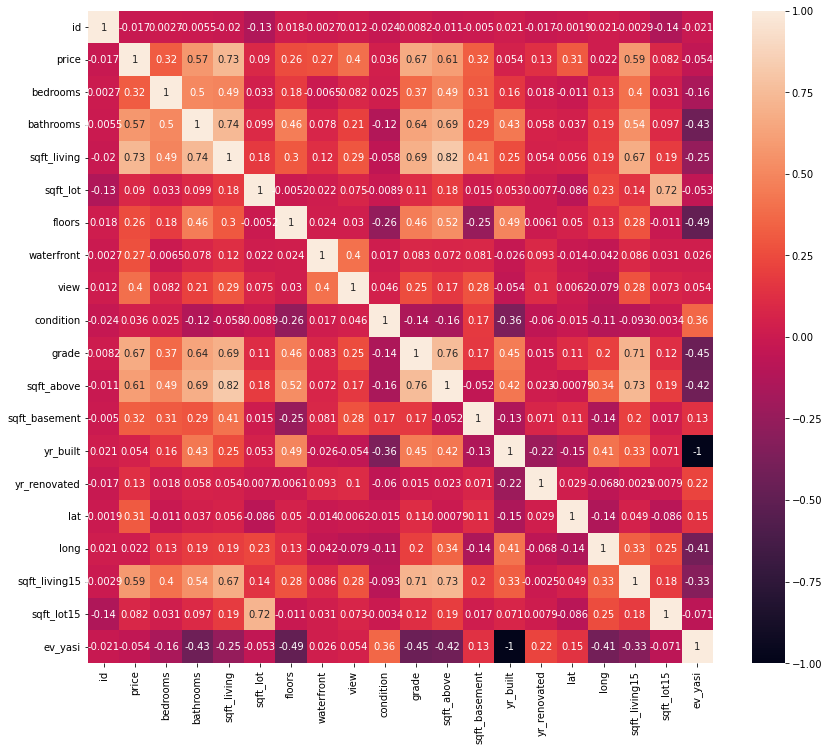

In [31]:
# visualize the correlation status 
ax = plt.subplots(figsize = (14, 12))
sns.heatmap(df.corr(), annot = True)

In [32]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.727443
grade            0.667455
sqft_above       0.605595
sqft_living15    0.585388
bathrooms        0.573192
view             0.397209
sqft_basement    0.323642
bedrooms         0.316409
lat              0.306997
waterfront       0.266398
floors           0.256894
yr_renovated     0.126547
sqft_lot         0.089683
sqft_lot15       0.082469
yr_built         0.053973
ev_yasi          0.053973
condition        0.036361
long             0.021590
id               0.016680
Name: price, dtype: float64

In [33]:
# we take only the columns which has more then 20 percent and less then 80 percent correlation with price to have optimal regression results and to prevent overfitting
x = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_basement', 'view', 'bathrooms', 'bedrooms', 'lat', 'waterfront', 'floors']]

In [34]:
x=pd.get_dummies(x,drop_first=True)

In [35]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,sqft_basement,view,bathrooms,bedrooms,lat,waterfront,floors
0,1392400,7,1180,1340,0,0,1.0000,3,47.5112,0,1.0
1,6604900,7,2170,1690,400,0,5.0625,3,47.7210,0,2.0
2,592900,6,770,2720,0,0,1.0000,2,47.7379,0,1.0
3,3841600,7,1050,1360,910,0,9.0000,4,47.5208,0,1.0
4,2822400,8,1680,1800,0,0,4.0000,3,47.6168,0,1.0


In [36]:
y=df[['price']]

In [37]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [38]:
y.shape

(21608, 1)

In [39]:
from sklearn.linear_model import LinearRegression #sciencekitlearn,eskaylearn
from sklearn.model_selection import train_test_split

In [40]:
# we split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=13)



In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17286, 11), (4322, 11), (17286, 1), (4322, 1))

In [43]:
# we feed the algorythm with training dataframe
lr= LinearRegression()
regmodel = lr.fit(x_train, y_train) 

In [44]:
# we use the algorythm to find the test data's prices
y_pretest = regmodel.predict(x_test) 
y_pretest

array([[ 624793.89013318],
       [ 569837.33045082],
       [1122645.75904164],
       ...,
       [ 480491.35572914],
       [ 439225.29160252],
       [ 663451.47219707]])

In [45]:
# lets see our accuracy
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

206653.4106431035

In [56]:
r2_score(y_test, y_pretest)
# it is okay.

0.7053397353092425